## Notebook to attempt to visualize the age analyses resutls as a heatmap

In [1]:
!date

Wed Mar 30 18:00:01 EDT 2022


#### import libraries and set notebook variables

In [2]:
from pandas import read_csv, pivot
from seaborn import clustermap
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

%matplotlib inline
# for white background of figures (only for docs rendering)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [3]:
# parameters
cohort = 'aging'
assay = 'RNA'

# directories for initial setup
home_dir = '/labshare/raph/datasets/adrd_neuro'
wrk_dir = f'{home_dir}/{cohort}'
results_dir = f'{wrk_dir}/results'

# in files
results_file = f'{results_dir}/{cohort}.glmmtmb_age_diffs.csv'

# out file

# constants
debug = True

#### load the results to include in the figure

In [4]:
%%time
results_df = read_csv(results_file)
print(results_df.shape)
if debug:
    display(results_df.head())

(299534, 9)


,feature,intercept,estimate,std.error,statistic,p.value,tissue,type,fdr_bh
0,AL627309.1,-3.532232,0.437769,0.198571,2.204596,0.027482,Middle temporal gyrus,brain_region,0.123209
1,AL627309.5,-2.466935,0.233767,0.148533,1.573841,0.115524,Middle temporal gyrus,brain_region,0.265975
2,AC114498.1,-9.307264,2.061367,1.253926,1.643931,0.100191,Middle temporal gyrus,brain_region,0.245341
3,AL669831.2,-5.156279,-0.736573,0.344991,-2.135051,0.032757,Middle temporal gyrus,brain_region,0.134740
4,LINC01409,-0.621747,0.135679,0.155248,0.873948,0.382147,Middle temporal gyrus,brain_region,0.549119


CPU times: user 343 ms, sys: 35.1 ms, total: 378 ms
Wall time: 377 ms


#### need to reformat results table to proper contents and shape for us with clustermap

#### subset to desired result set type

In [5]:
results_df.type.value_counts()

cell_type       157572
broad_type       75738
brain_region     66224
Name: type, dtype: int64

In [6]:
this_type = 'cell_type'
result_set_df = results_df.loc[results_df.type == this_type]
print(result_set_df.shape)
if debug:
    display(result_set_df.head())

(157572, 9)


,feature,intercept,estimate,std.error,statistic,p.value,tissue,type,fdr_bh
66224,AL627309.5,-2.184424,0.238745,0.112574,2.120777,0.033941,ExN CUX2 LAMP5,cell_type,0.137298
66225,LINC01409,-0.156989,-0.040181,0.054000,-0.744101,0.456815,ExN CUX2 LAMP5,cell_type,0.615619
66226,NOC2L,-1.060869,-0.107795,0.099441,-1.084014,0.278359,ExN CUX2 LAMP5,cell_type,0.449901
66227,KLHL17,-2.886849,0.218999,0.258417,0.847464,0.396737,ExN CUX2 LAMP5,cell_type,0.562456
66228,ISG15,-3.151931,-0.463629,0.202407,-2.290578,0.021988,ExN CUX2 LAMP5,cell_type,0.110181


#### what tissue results are present in this result type

In [7]:
result_set_df.tissue.value_counts()

InN ADARB2 VIP       12338
ExN CUX2 LAMP5       11613
ExN RORB THEMIS      10836
ExN CUX2 ADARB2      10789
SPN D1               10249
InN LHX6 PVALB       10040
SPN D2                9828
ExN FEZF2             9291
Oligodendrocyte-1     7925
InN LHX6 SST          7768
ExN RORB              7340
Astrocyte             6629
InN ADARB2 LAMP5      6438
Oligodendrocyte-2     6323
SPN D1-2              5564
Ependymal             4601
OPC                   4275
Microglia             4236
ExN THEMIS            3643
Mural                 2220
SPN D2-2              2056
Endothelial           1242
Oligodendrocyte-3     1180
ExN LAMP5             1148
Name: tissue, dtype: int64

#### can use pandas pivot to reformat results into desired shape, of result value (rows) per gene per category type (cols) 

In [8]:
# fig_df = result_set_df.pivot(index='feature', columns='tissue')['estimate']
fig_df = result_set_df.pivot(index='feature', columns='tissue')['statistic']
print(fig_df.shape)
if debug:
    display(fig_df.head())

(22263, 24)


tissue,Astrocyte,Endothelial,Ependymal,ExN CUX2 ADARB2,ExN CUX2 LAMP5,ExN FEZF2,ExN LAMP5,ExN RORB,ExN RORB THEMIS,ExN THEMIS,...,Microglia,Mural,OPC,Oligodendrocyte-1,Oligodendrocyte-2,Oligodendrocyte-3,SPN D1,SPN D1-2,SPN D2,SPN D2-2
feature,,,,,,,,,,,,,,,,,,,,,
A1BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.791795,-1.233536,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1BG-AS1,NaN,NaN,1.375891,-0.760938,-0.473010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.987874,NaN,NaN,-1.645575,NaN,0.472180,NaN
A1CF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.321872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2M,NaN,-1.465672,NaN,NaN,-0.622028,-1.870989,NaN,NaN,-1.556805,-0.918974,...,1.421374,NaN,-4.678564,NaN,-1.634996,NaN,-0.280425,NaN,-0.081806,NaN
A2M-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-2.877900,-1.799196,NaN,NaN,NaN,NaN,NaN,NaN


#### need to fill missing with no effect; ie 0. missing was likely the result of untestable in the tissue if full results files was loaded

In [9]:
fig_df.fillna(0, inplace=True)
print(fig_df.shape)
if debug:
    display(fig_df.head())

(22263, 24)


tissue,Astrocyte,Endothelial,Ependymal,ExN CUX2 ADARB2,ExN CUX2 LAMP5,ExN FEZF2,ExN LAMP5,ExN RORB,ExN RORB THEMIS,ExN THEMIS,...,Microglia,Mural,OPC,Oligodendrocyte-1,Oligodendrocyte-2,Oligodendrocyte-3,SPN D1,SPN D1-2,SPN D2,SPN D2-2
feature,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.791795,-1.233536,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
A1BG-AS1,0.0,0.000000,1.375891,-0.760938,-0.473010,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,-0.987874,0.000000,0.0,-1.645575,0.0,0.472180,0.0
A1CF,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-2.321872,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
A2M,0.0,-1.465672,0.000000,0.000000,-0.622028,-1.870989,0.0,0.000000,-1.556805,-0.918974,...,1.421374,0.0,-4.678564,0.000000,-1.634996,0.0,-0.280425,0.0,-0.081806,0.0
A2M-AS1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,-2.877900,-1.799196,0.000000,0.0,0.000000,0.0,0.000000,0.0


#### subset full results to gene set to use for plotting

In [10]:
# this is crude brute looping
gene_set = {}
for tissue in fig_df.columns:
    print(tissue)
    temp = fig_df.sort_values(tissue, ascending=False)
    top5pos = temp.head(5)
    top5pos = top5pos.loc[top5pos[tissue] > 0]
    top5neg = temp.tail(5)
    top5neg = top5neg.loc[top5neg[tissue] < 0]
    # display(top5pos.head())
    # display(top5neg.tail())
    tissue_genes = set(top5pos.index) | set(top5neg.index)
    gene_set = set(gene_set) | tissue_genes
    print(tissue_genes)    
    
print(len(gene_set))
print(gene_set)

Astrocyte
{'HLA-A', 'B4GAT1', 'COX6C', 'EGF', 'GMPR', 'WNT5B', 'TNFRSF11B', 'KCNK1', 'AC024257.1', 'TNS2'}
Endothelial
{'TUSC3', 'CP', 'SERTAD2', 'TMEM132C', 'NPAS2', 'ID1', 'MBOAT2', 'THRB', 'TGM2', 'SLC11A2'}
Ependymal
{'GLIPR1L2', 'KCND3', 'LINC02021', 'ACTR3B', 'AC092802.1', 'TMTC2', 'RGS20', 'ACTB', 'VCL', 'DOCK5'}
ExN CUX2 ADARB2
{'TUSC3', 'TGM3', 'RORB', 'CELSR1', 'SLC35F4', 'SOX9-AS1', 'MYRFL', 'ATP8A1', 'RABEPK', 'PRDM5'}
ExN CUX2 LAMP5
{'KIF13B', 'ALS2CL', 'CALCOCO2', 'LINC01151', 'AC095060.1', 'HIP1', 'LINC02237', 'SERPINB6', 'UACA', 'IL12A-AS1'}
ExN FEZF2
{'RHBDL3', 'NR3C2', 'LINC00907', 'DOC2B', 'AC034195.1', 'AL590807.1', 'SLC38A11', 'LINC00378', 'CNBD1', 'MTAP'}
ExN LAMP5
{'NECAB1', 'LRRC4C', 'SLC8A1', 'CCBE1', 'AL024495.1', 'CUX2', 'ADARB2', 'TCERG1L', 'SPON1', 'ELAVL2'}
ExN RORB
{'RHBDL3', 'RIMS2', 'PKD1L1', 'GRIN2B', 'AC093610.1', 'HHAT', 'ARHGAP10', 'P2RY6', 'DNM3', 'ITGA9'}
ExN RORB THEMIS
{'PRDM2', 'CCND3', 'ELFN2', 'RHBDL3', 'NR3C2', 'MIR31HG', 'L3MBTL4', 'RXRG', 

In [11]:
fig_df = fig_df.loc[fig_df.index.isin(gene_set)]
print(fig_df.shape)
if debug:
    display(fig_df.head())

(220, 24)


tissue,Astrocyte,Endothelial,Ependymal,ExN CUX2 ADARB2,ExN CUX2 LAMP5,ExN FEZF2,ExN LAMP5,ExN RORB,ExN RORB THEMIS,ExN THEMIS,...,Microglia,Mural,OPC,Oligodendrocyte-1,Oligodendrocyte-2,Oligodendrocyte-3,SPN D1,SPN D1-2,SPN D2,SPN D2-2
feature,,,,,,,,,,,,,,,,,,,,,
ABCC8,0.000000,0.0,0.0,0.000000,-0.154067,2.188194,0.0,0.0,0.000000,0.000000,...,0.0,0.0,5.316305,0.892181,-1.650203,0.000000,0.000000,0.758400,0.000000,0.000000
AC005252.4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC007319.1,-0.827055,0.0,0.0,-0.435641,-1.671928,-1.608433,0.0,0.0,-0.683953,-0.692237,...,0.0,0.0,-1.204501,-3.629240,-2.419129,-4.645647,-1.493599,-1.757242,-0.799017,-1.419008
AC010974.2,-1.683624,0.0,0.0,0.000000,-1.349843,-1.823346,0.0,0.0,-2.825000,0.000000,...,0.0,0.0,-2.115362,1.446436,2.929307,0.000000,-2.523020,0.000000,-3.563651,0.000000
AC016587.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


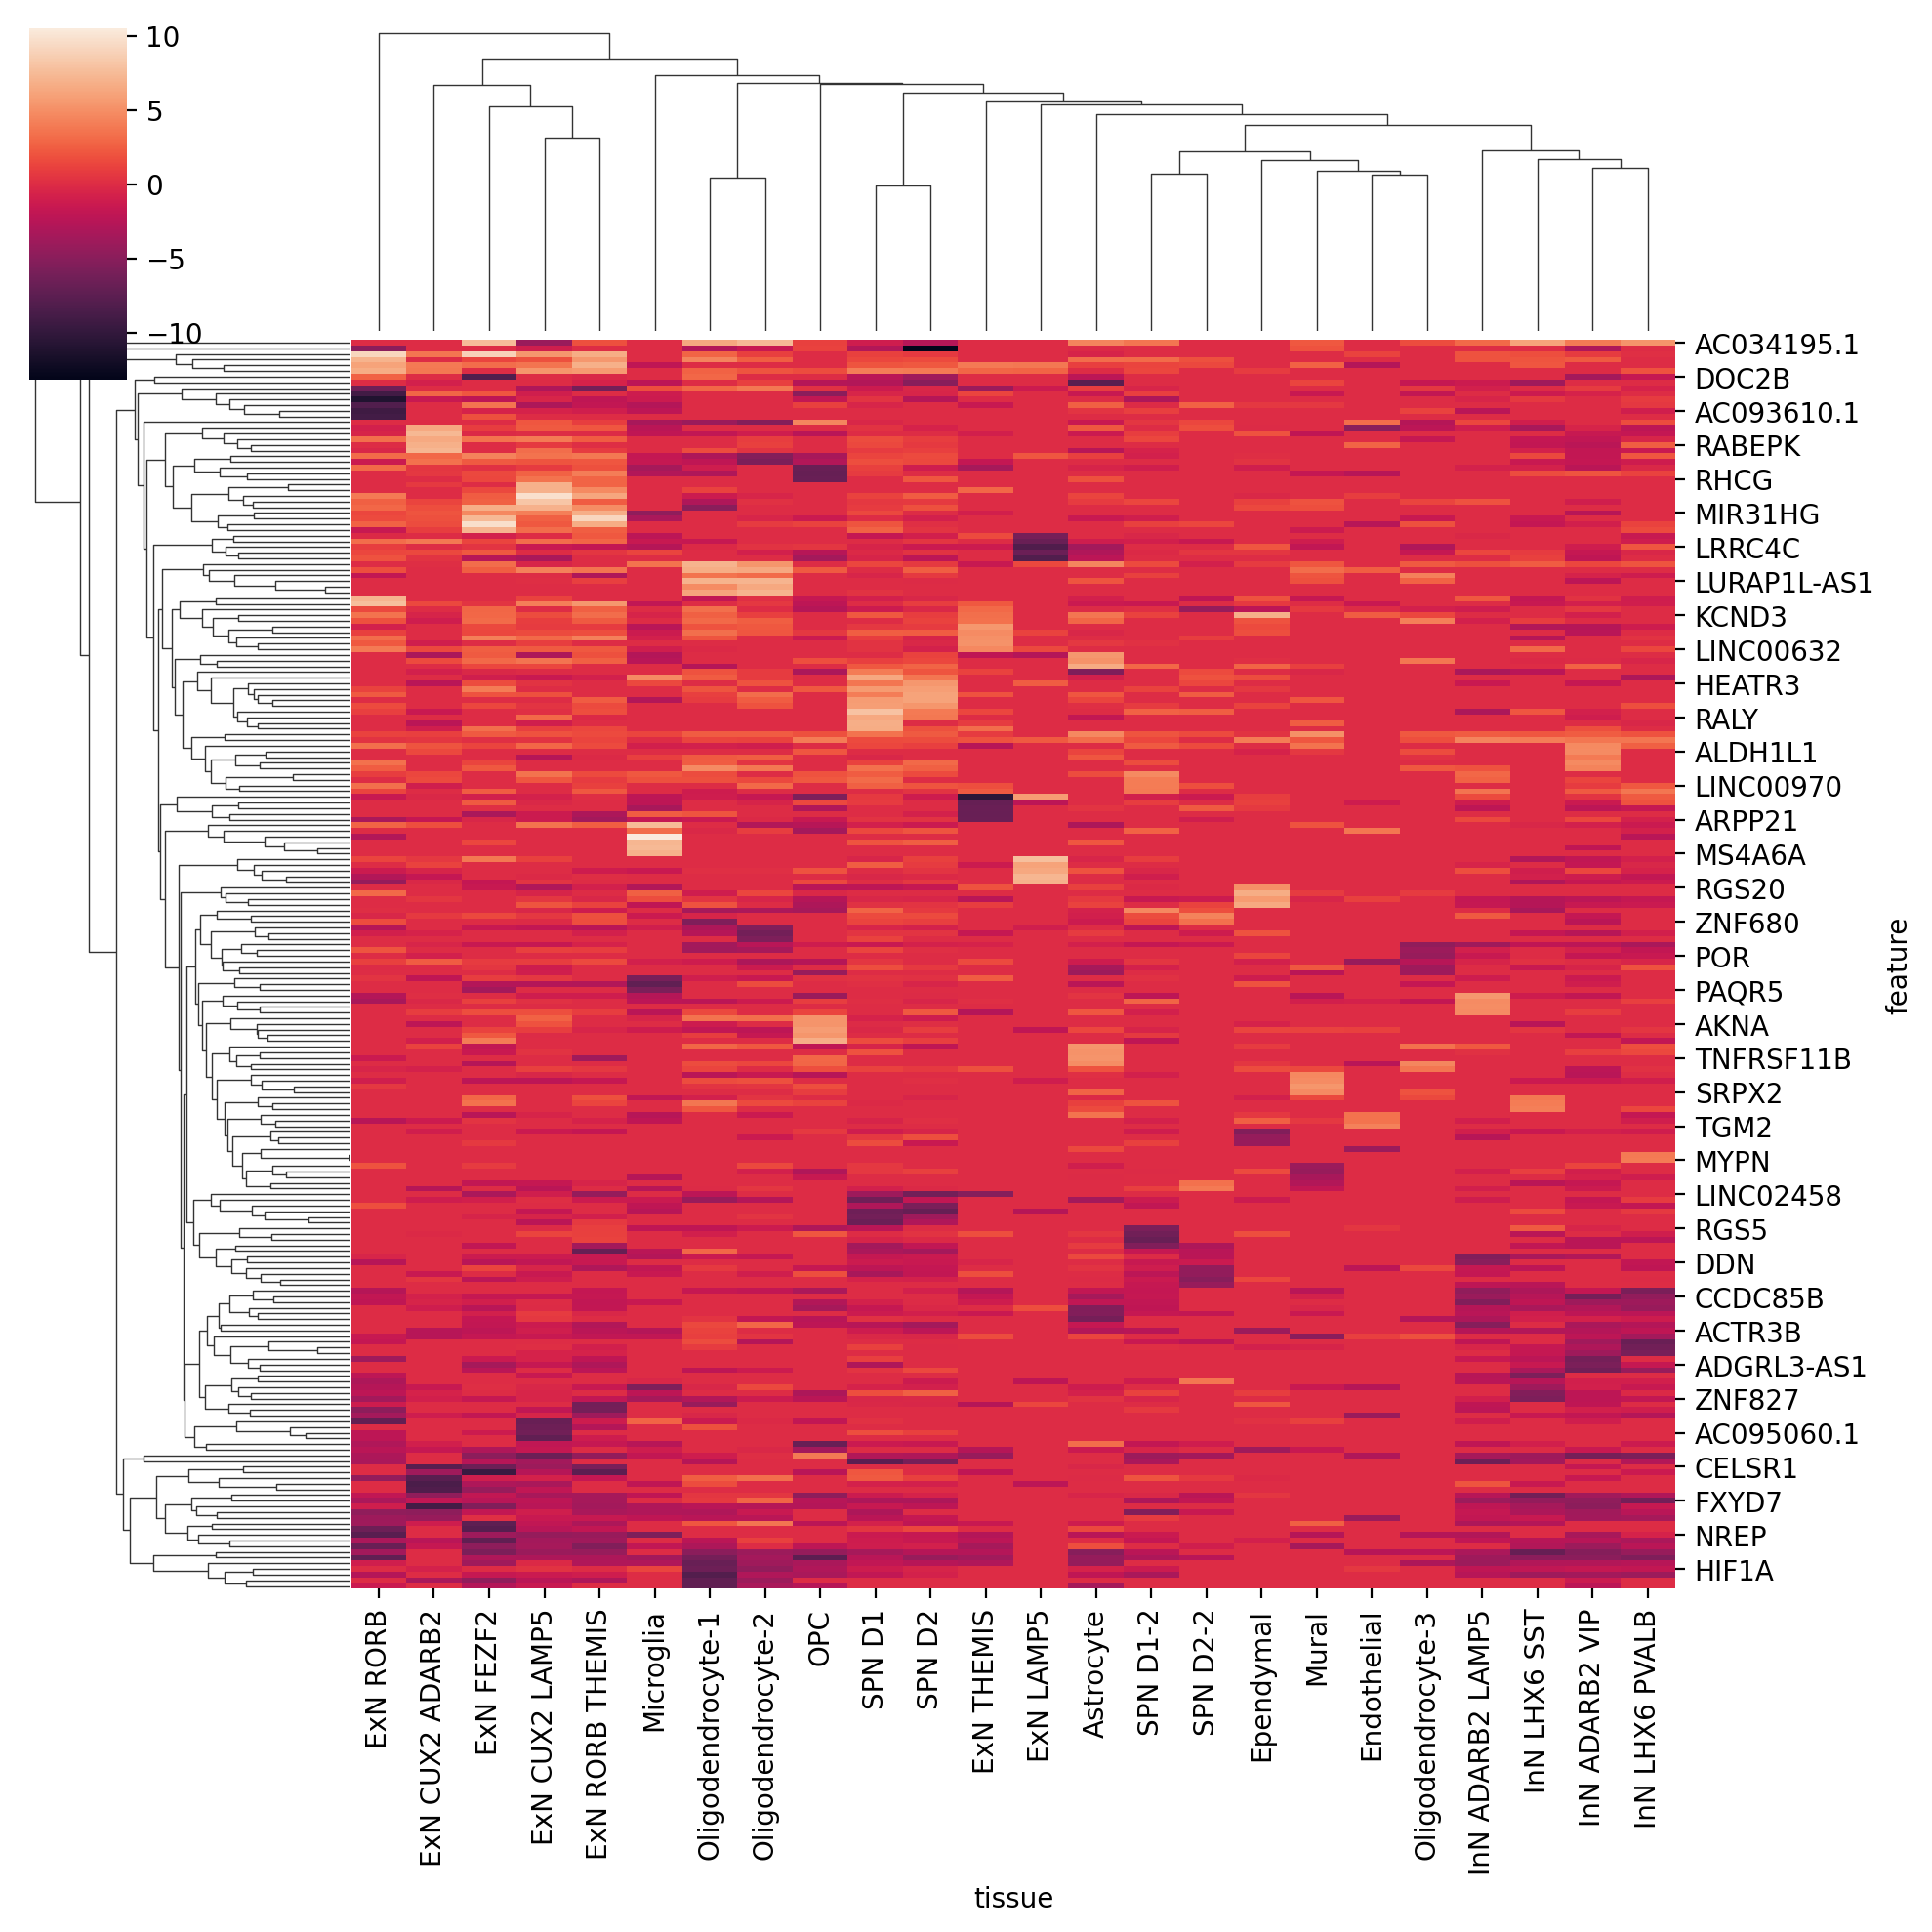

In [12]:
with rc_context({'figure.figsize': (8, 8), 'figure.dpi': 100}):
    plt.style.use('seaborn-bright')
    clustermap(fig_df)

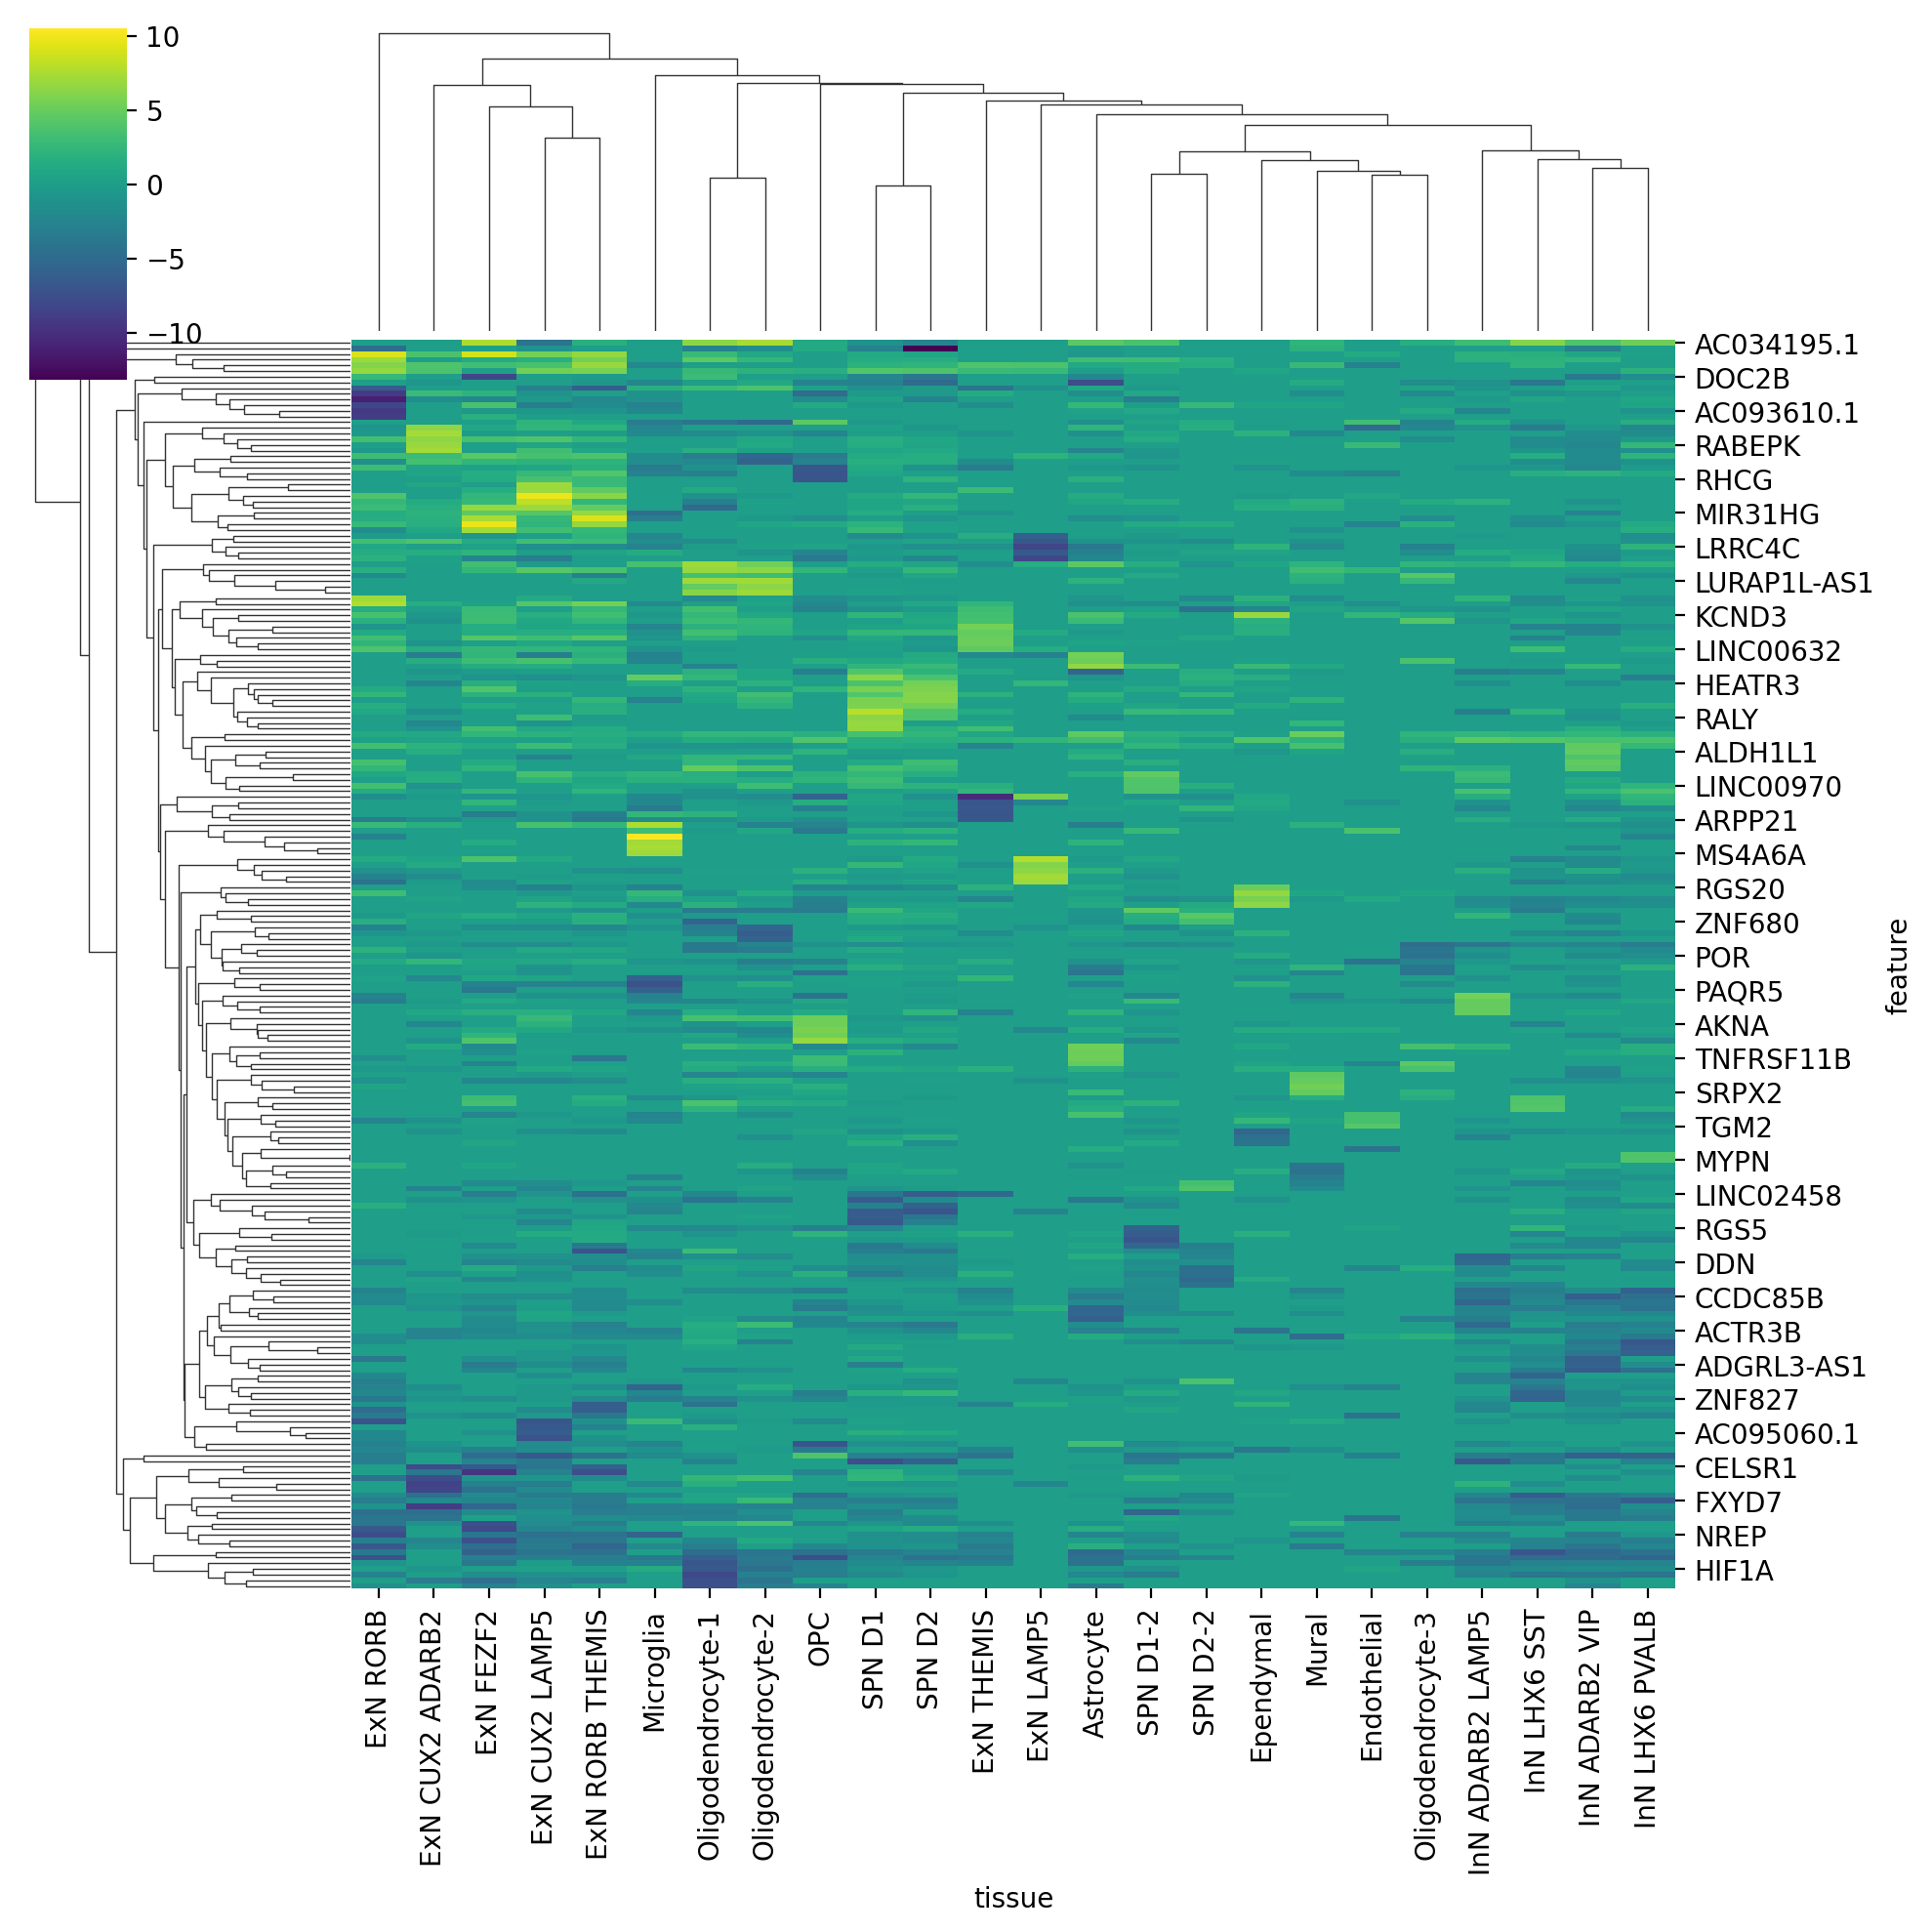

In [13]:
with rc_context({'figure.figsize': (8, 8), 'figure.dpi': 100}):
    plt.style.use('seaborn-bright')
    clustermap(fig_df, cmap='viridis')

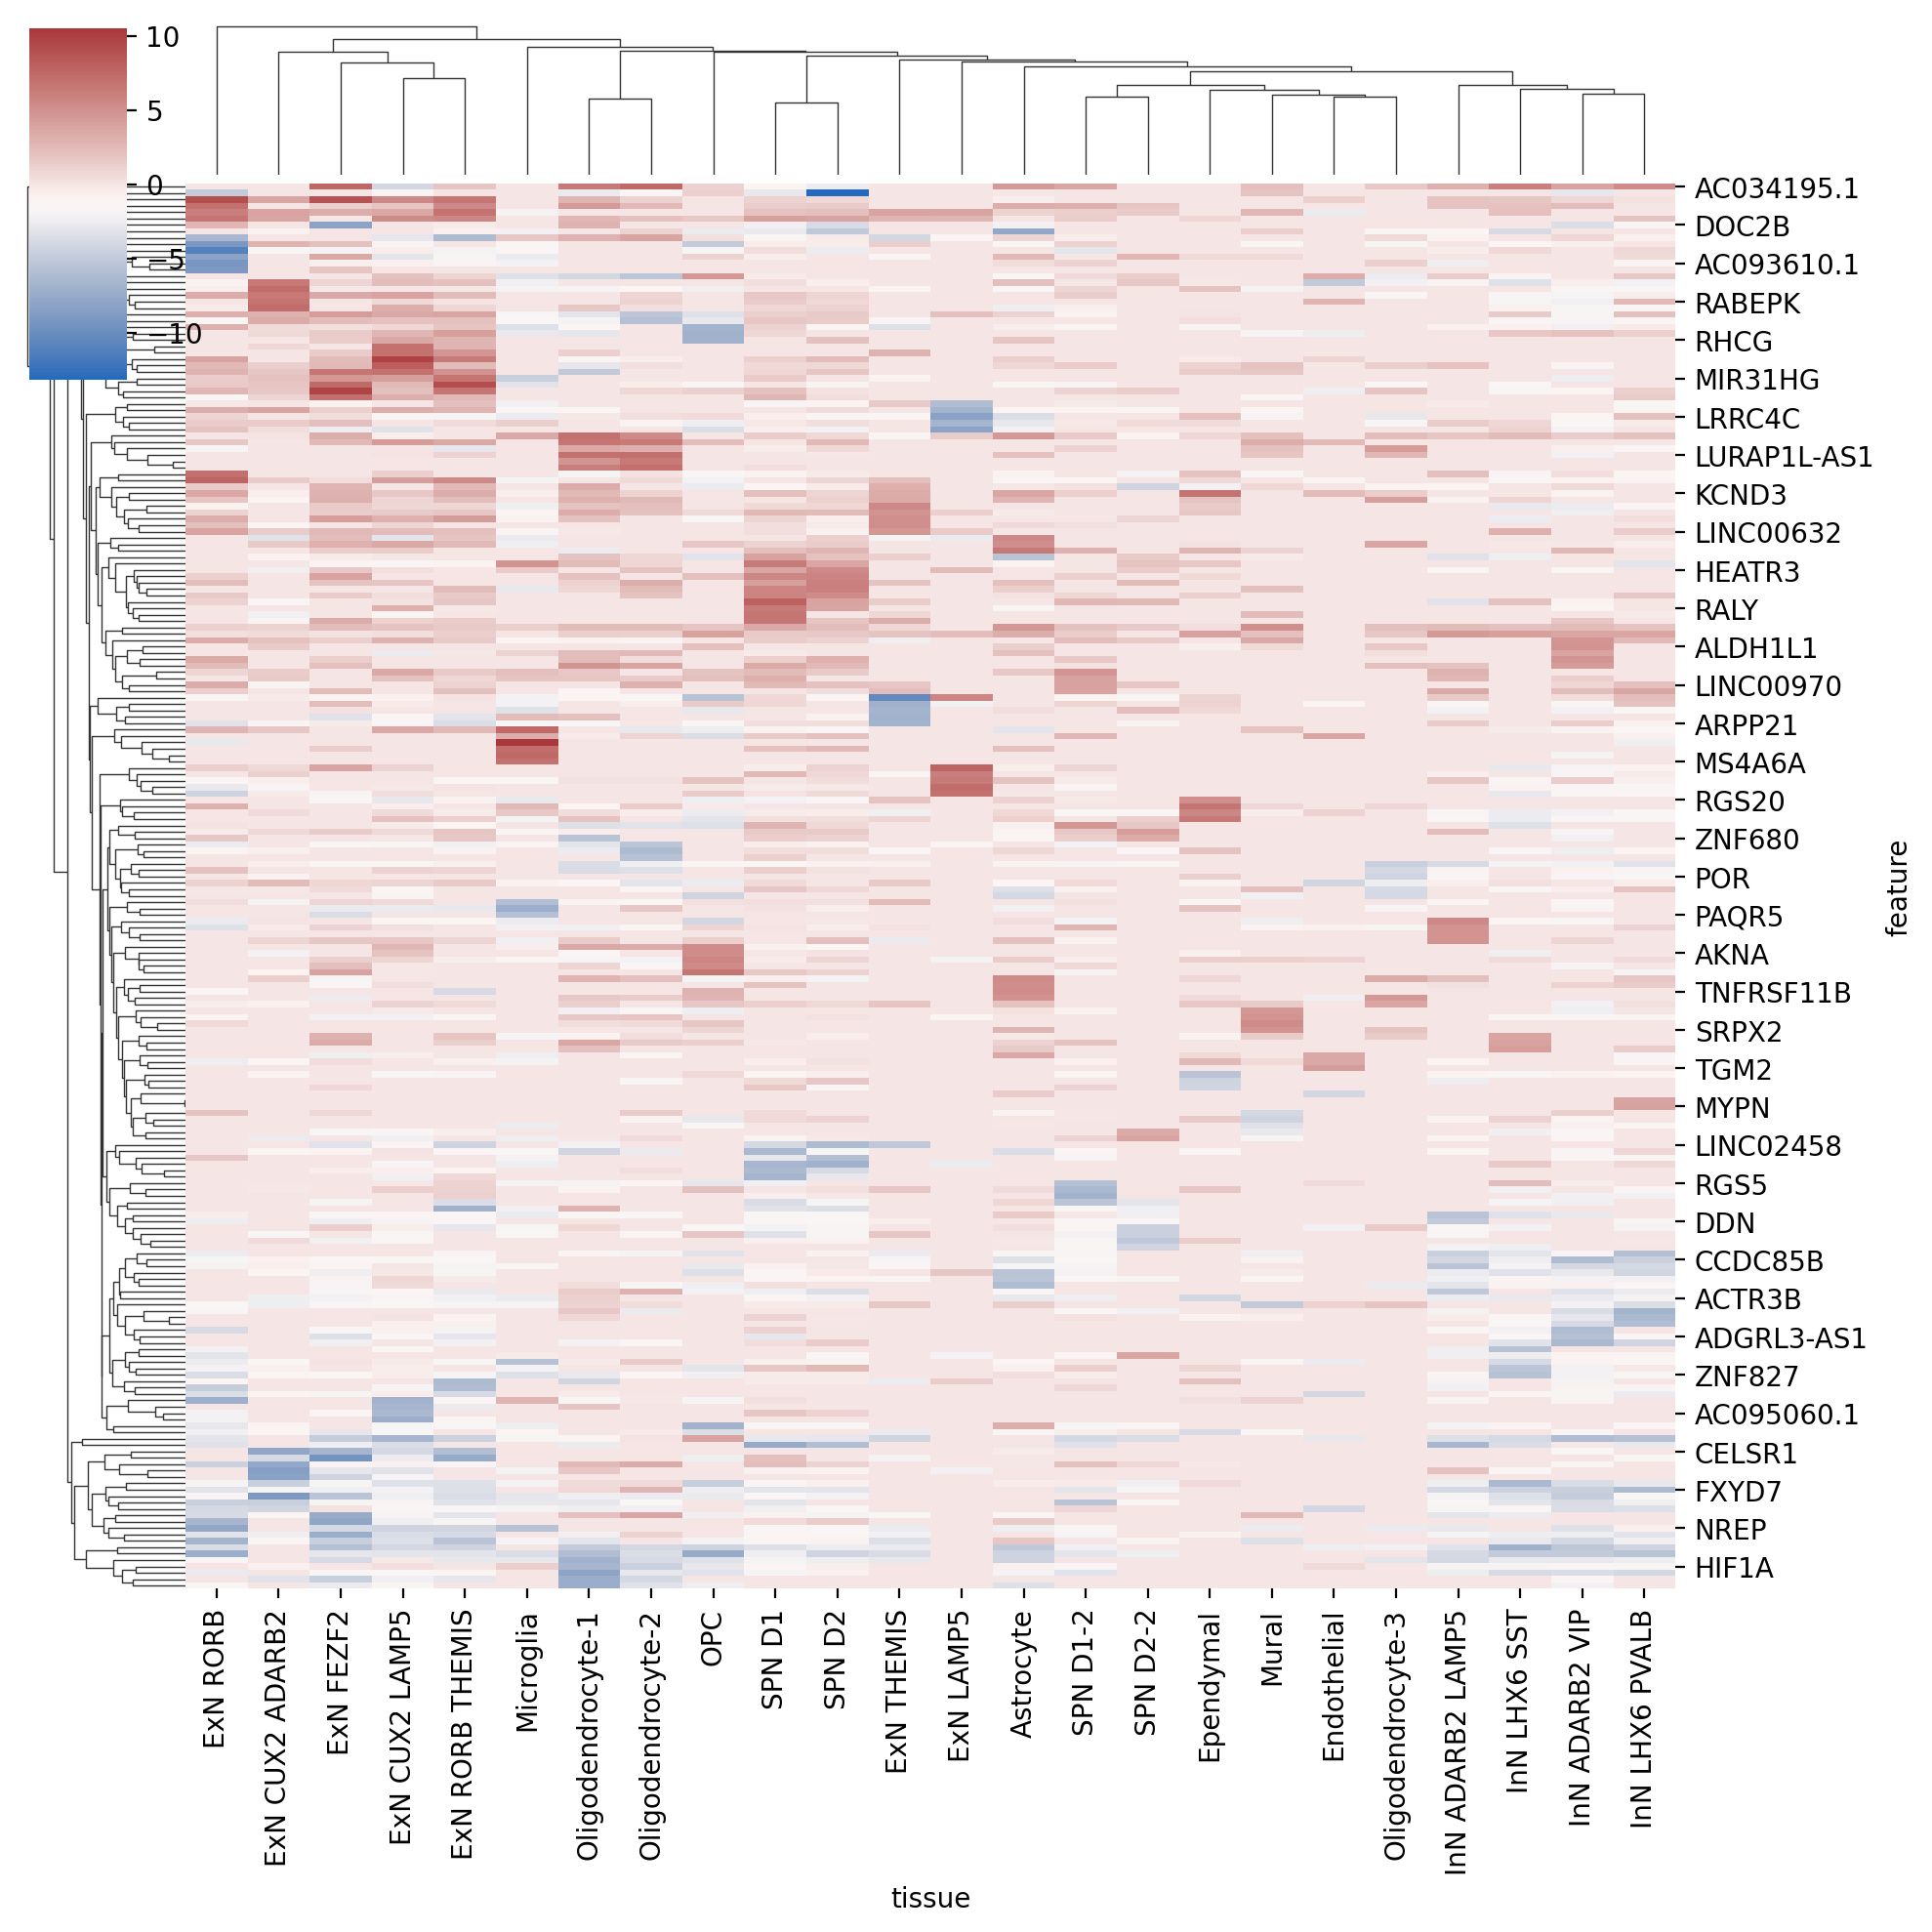

In [14]:
with rc_context({'figure.figsize': (8, 8), 'figure.dpi': 100}):
    plt.style.use('seaborn-bright')
    clustermap(fig_df, cmap='vlag', col_cluster=True, row_cluster=True, dendrogram_ratio=0.1)

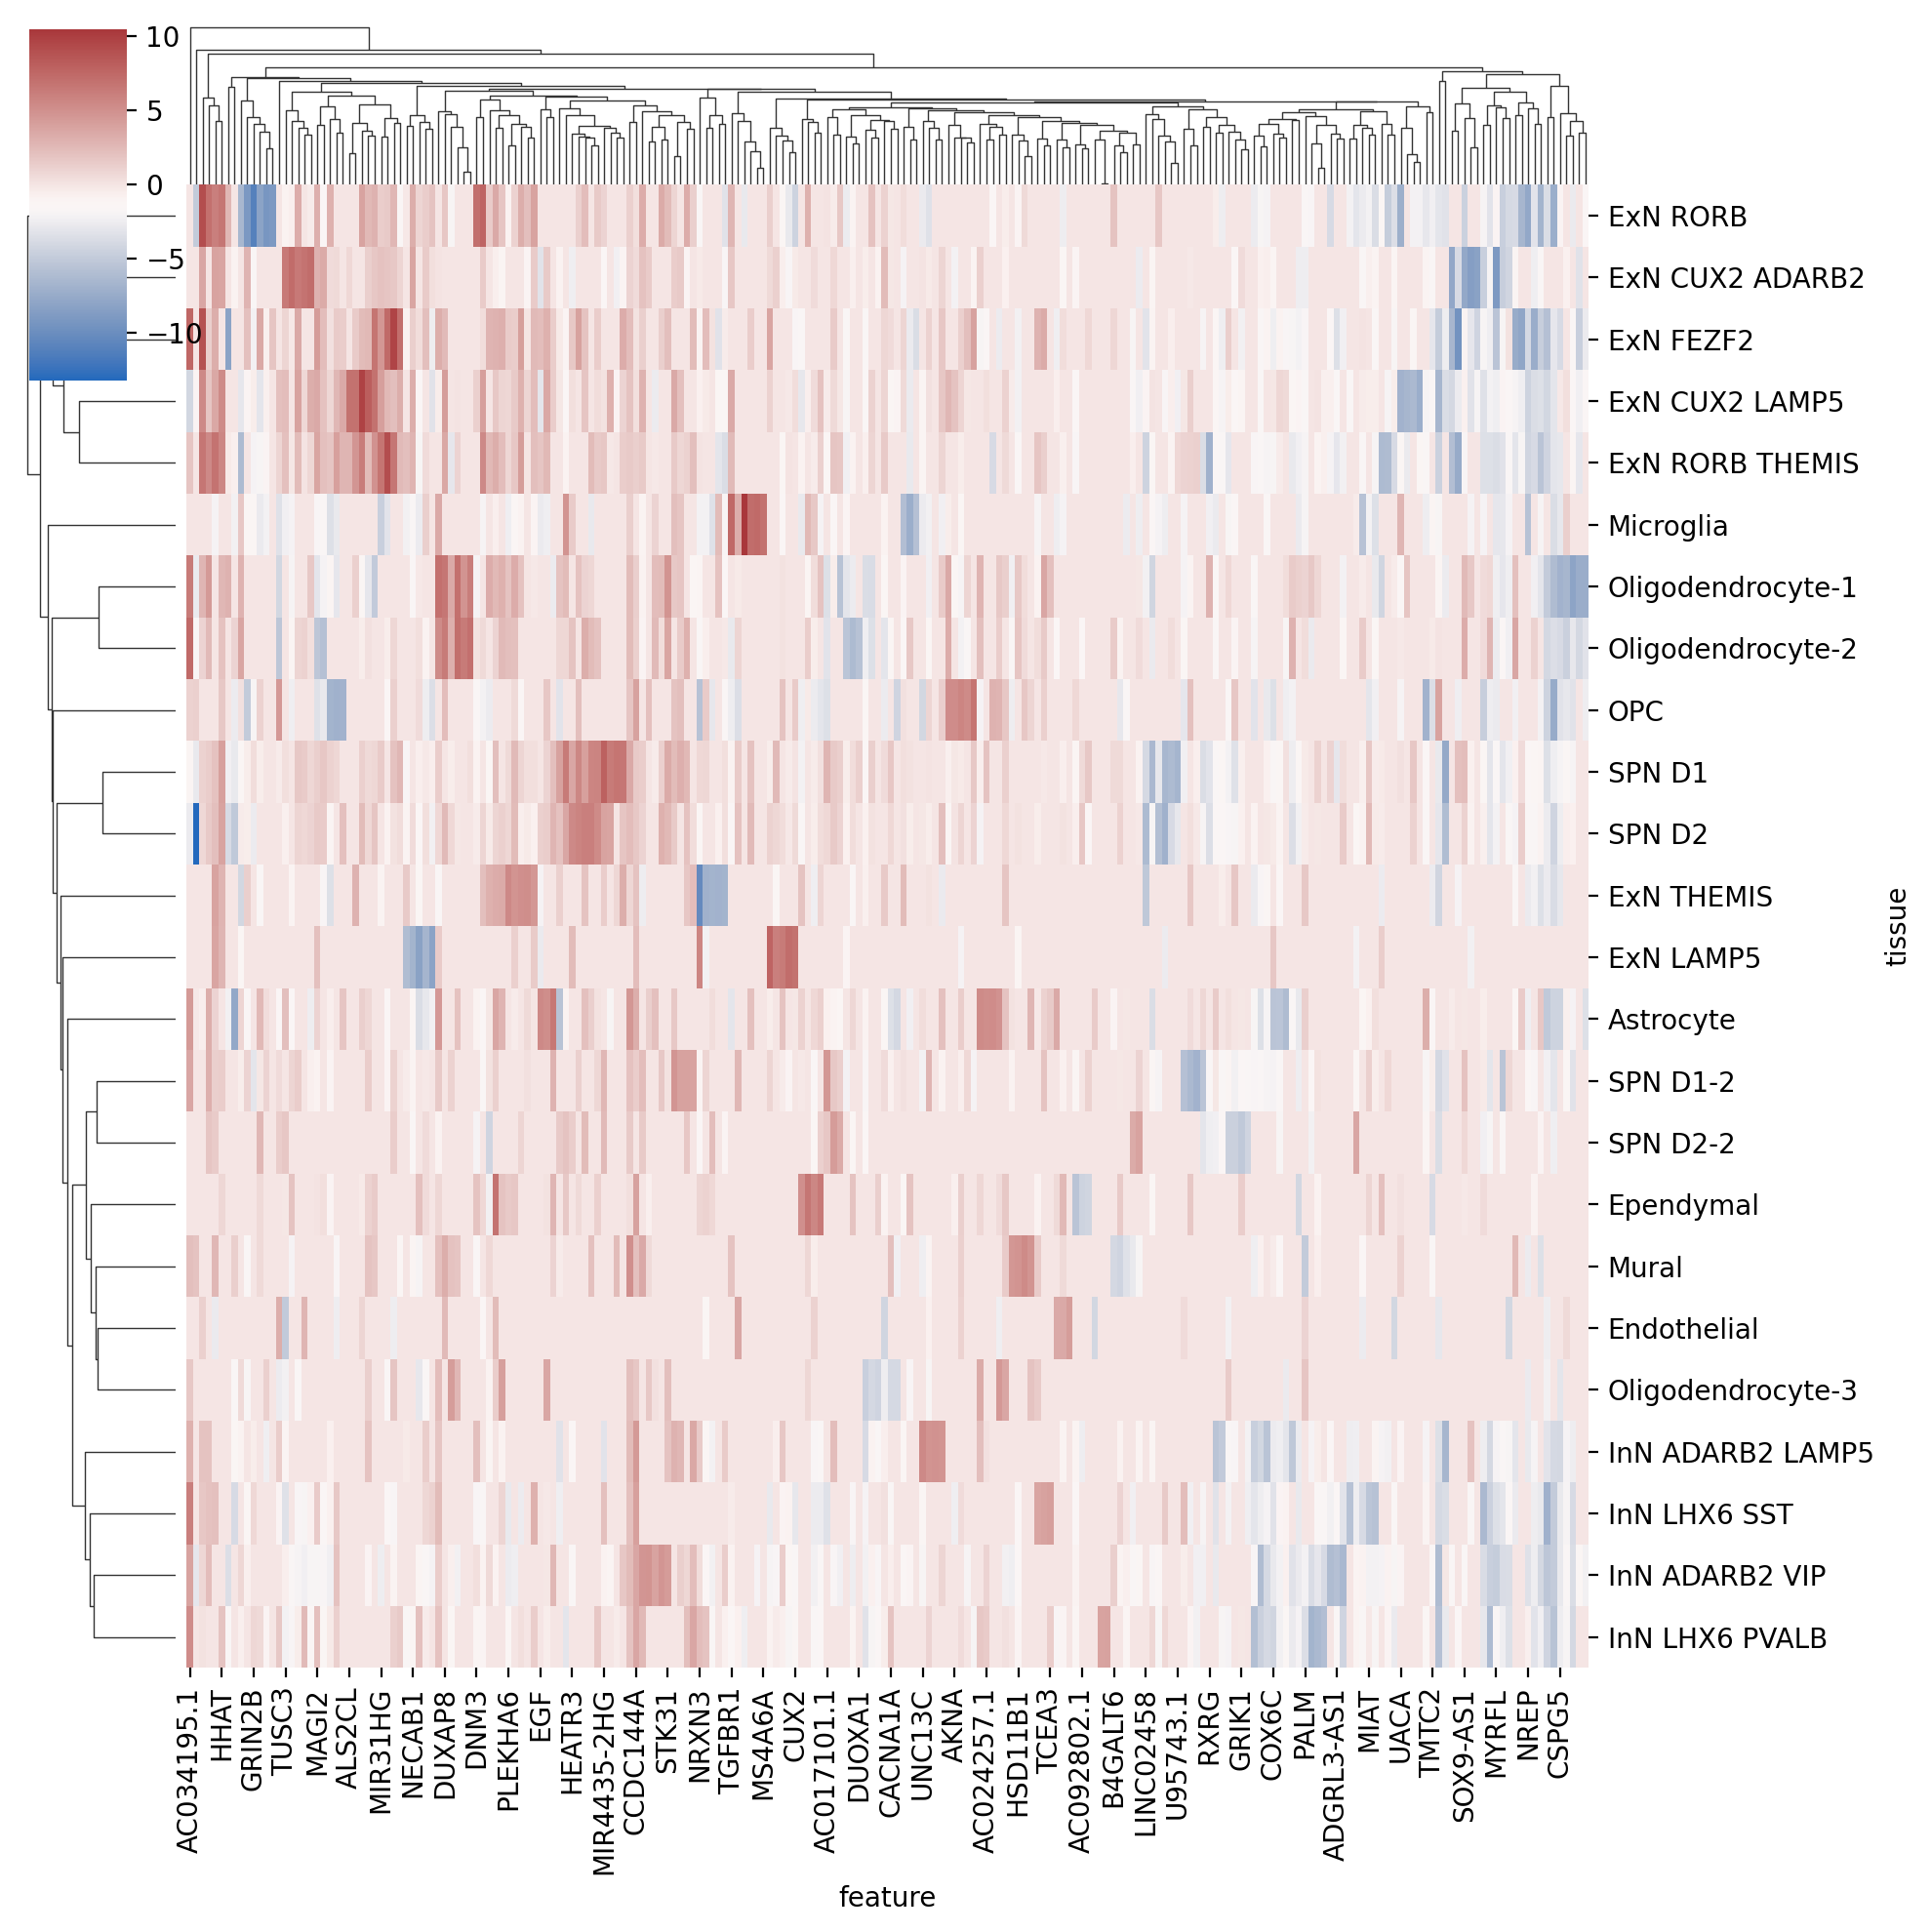

In [15]:
with rc_context({'figure.figsize': (8, 8), 'figure.dpi': 100}):
    plt.style.use('seaborn-bright')
    clustermap(fig_df.T, cmap='vlag', col_cluster=True, row_cluster=True, dendrogram_ratio=0.1)

In [16]:
!date

Wed Mar 30 18:00:06 EDT 2022
